# Kinematic analysis of an four-bar elliptic exercising machine

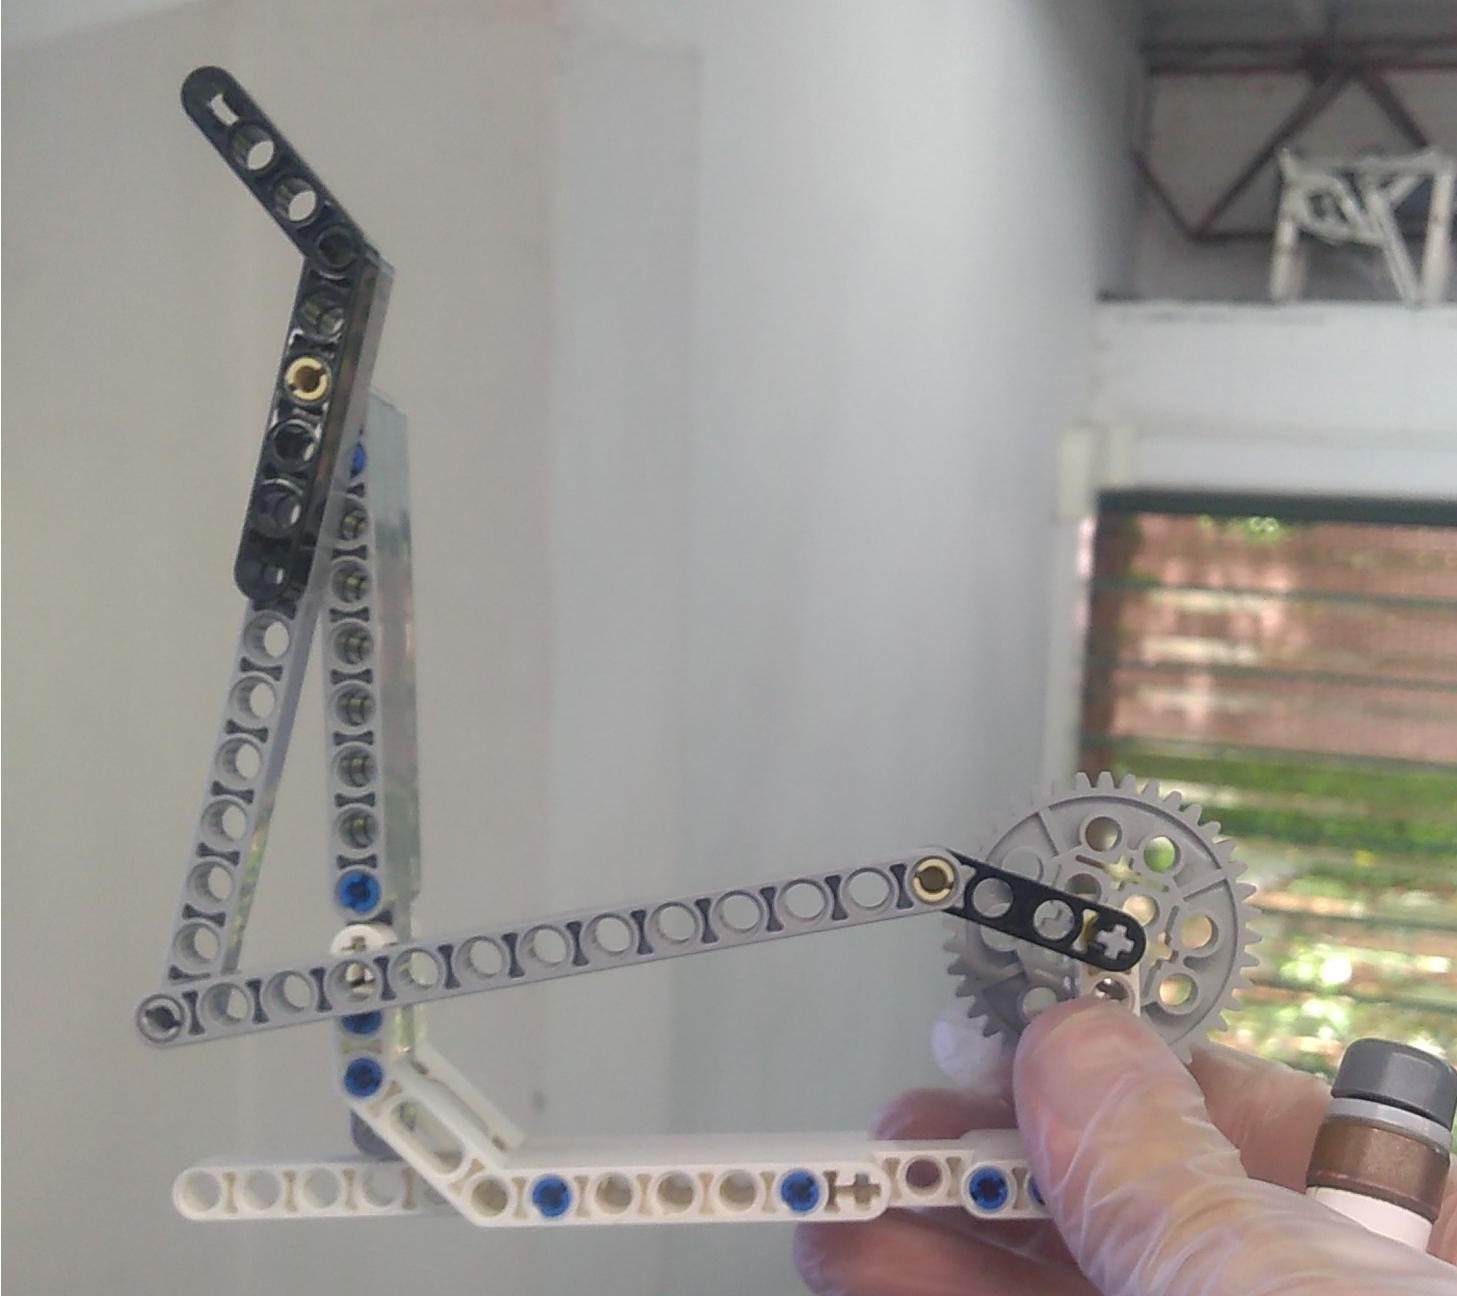

## Description
This mechanism was designed in (aqui pongo el año) by (...) (autor & otro, 2021). \[Recomendación para gestionar referencias y citas: Mendeley.

Para buscar información en las bases de datos de la UPB: https://bibliotecavirtual.upb.edu.co/\]

Shyu et. al. (2011) proposed a adjustable 2 degrees of freedom elliptical excercising machine that .....

More information about this mechanism can be found on Norton (2009).

\[otra forma de citar: \]... kinematic analysis of this mechanism has been done in the reviewed literature (Norton, 2009).

Another implementation of an elliptical machine (...)

## Kinematic analysis

![Diagrama Cinemático](img/ElipticaCinematicoDigital.png)

### Mobility (Degrees of Freedom)

$n = 4$, $f_1 = 4$, $f_2 = 0$

\begin{equation}
\label{eq:1}
F = 3(n-1)-2f_1-f_2
\end{equation}

given $n$, $f_1$ and $f_2$, the DOF of the studied mechanism are obtained from evaluating (1)

$F = 1$ (2).

### Parameters and variables

Parameters: $r_2,r_3,r_4,r_{1x},r_{1y}$

Main variables: $\theta_2$

Secondary variables: $\theta_3, \theta_4$

### Vector diagram

![Diagrama Vectorial](img/ElipticaVectorialDigital.png)

### Vector equations

$\overrightarrow{r_2}+\overrightarrow{r_3}-\overrightarrow{r_4}-\overrightarrow{r_{1y}}-\overrightarrow{r_{1x}} = 0$

### Scalar equations

$r_2\cdot cos(\theta_{2})+r_3\cdot cos(\theta_{3})-r_4\cdot cos(\theta_{4})-r_{1y}\cdot cos(90°)-r_{1x}\cdot cos(180°)=0$,

$r_2\cdot sin(\theta_{2})+r_3\cdot sin(\theta_{3})-r_4\cdot sin(\theta_{4})-r_{1y}\cdot sin(90°)-r_{1x}\cdot sin(180°)=0$

which, after reducing terms, yields


$r_2\cdot cos(\theta_{2})+r_3\cdot cos(\theta_{3})-r_4\cdot cos(\theta_{4})+r_{1x}=0$,

$r_2\cdot sin(\theta_{2})+r_3\cdot sin(\theta_{3})-r_4\cdot sin(\theta_{4})-r_{1y}=0$

### Initial Conditions Measurement

![CI](img/ElipticaMedicion.png)

Approximated values of $\theta_3$ and $\theta_4$ were measured for a specific position of link 2 (crank):

Variable|Value
:---:|:---:
$\theta_2$|**161.24°**
$\theta_3$|10.38°+180° = **190.38°**
$\theta_4$|76.95°+180° = **256.95°**

## Kinematic analysis - implementation

### Initialization

In [1]:
%reset -sf

import numpy as np
from scipy.optimize import fsolve 
import matplotlib.pyplot as plt

### Function definition

In [2]:
def eliptica(x0):
    # condiciones iniciales
    th3,th4 = x0
     
    return [r2*np.cos(th2) + r3*np.cos(th3) - r4*np.cos(th4) - r1y*np.cos(np.pi/2) - r1x*np.cos(np.pi),
            r2*np.sin(th2) + r3*np.sin(th3) - r4*np.sin(th4) - r1y*np.sin(np.pi/2) - r1x*np.sin(np.pi)]

### Function test

In [3]:
r2 = 3
r3 = 12
r4 = 10
r1x = 12
r1y = 9
th2 = np.deg2rad(161.24)

th3ini = np.deg2rad(190.38)
th4ini = np.deg2rad(256.95)

x0 = [th3ini,th4ini]

print(eliptica(x0))

[-0.38622245871843575, -0.455561574199043]


### Solution of non linear equations

In [4]:
#(incognita1,incognita2,...,incognitaN),info,exitflag,mensaje ... 
# = fsolve(funcion,x0,full_output = True)
th2 = th2 + np.radians(10)
(th3,th4),info,exitflag,mensaje = fsolve(eliptica, x0, full_output = True)
print('para th2  = ',np.degrees(th2))
print(np.rad2deg(th3),np.rad2deg(th4))
print(exitflag)
print(mensaje)
x0 = (th3,th4)

para th2  =  171.24
184.8789251761529 253.01313529611173
1
The solution converged.


### Point definition for mechanism graphic representation

![Puntos](img/ElipticaPuntosDigital.png)

In [5]:
th2 = th2 + 0.1
(th3,th4),info,exitflag,mensaje = fsolve(eliptica,
                                 x0,
                                 full_output = True)
print("solucion = ",np.rad2deg(th3),np.rad2deg(th4),"\n",exitflag,"\n",mensaje)

solucion =  183.3719281547847 252.69231095262649 
 1 
 The solution converged.


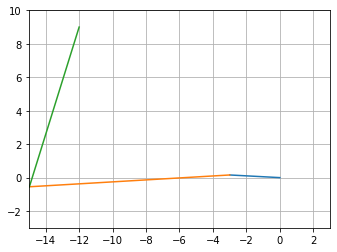

In [6]:
pOx = 0
pOy = 0
pAx = r2*np.cos(th2)
pAy = r2*np.sin(th2)
pBx = pAx + r3*np.cos(th3)
pBy = pAy + r3*np.sin(th3)
pCx = pBx - r4*np.cos(th4)
pCy = pBy - r4*np.sin(th4)

fig = plt.figure()
hr2 = plt.plot([pOx,pAx],[pOy,pAy])
hr3 = plt.plot([pBx,pAx],[pBy,pAy])
hr4 = plt.plot([pCx,pBx],[pCy,pBy])
plt.axis("scaled")
plt.xlim(-r2-r3,r2)
plt.ylim(-r2,r4)
plt.grid()
plt.draw() 

### Solution for a range of values

As this mechanism incorporates a crank, a continuous range can be provided:

$\theta_2 : [0°,360°]$

#### Input variable range definition

In [8]:
numpos = 360
th2_ini = th2
th2_fin = th2 + np.pi*2
th2v = np.linspace(th2_ini,th2_fin,numpos)
th2v

array([3.08870181, 3.10620372, 3.12370563, 3.14120754, 3.15870945,
       3.17621136, 3.19371326, 3.21121517, 3.22871708, 3.24621899,
       3.2637209 , 3.28122281, 3.29872472, 3.31622663, 3.33372854,
       3.35123045, 3.36873235, 3.38623426, 3.40373617, 3.42123808,
       3.43873999, 3.4562419 , 3.47374381, 3.49124572, 3.50874763,
       3.52624953, 3.54375144, 3.56125335, 3.57875526, 3.59625717,
       3.61375908, 3.63126099, 3.6487629 , 3.66626481, 3.68376671,
       3.70126862, 3.71877053, 3.73627244, 3.75377435, 3.77127626,
       3.78877817, 3.80628008, 3.82378199, 3.8412839 , 3.8587858 ,
       3.87628771, 3.89378962, 3.91129153, 3.92879344, 3.94629535,
       3.96379726, 3.98129917, 3.99880108, 4.01630298, 4.03380489,
       4.0513068 , 4.06880871, 4.08631062, 4.10381253, 4.12131444,
       4.13881635, 4.15631826, 4.17382017, 4.19132207, 4.20882398,
       4.22632589, 4.2438278 , 4.26132971, 4.27883162, 4.29633353,
       4.31383544, 4.33133735, 4.34883925, 4.36634116, 4.38384

#### Solution arrays definition

From now on we are using Numpy Arrays, as it is required for matrix operations and linear algebra. More on Numpy Arrays: https://youtu.be/DHdlPJKXCDc

####  Solution for the defined range

In [10]:
th3v = np.array([])
th4v = np.array([])
for i,th2 in enumerate(th2v):
    q,info,exitflag,mensaje = fsolve(eliptica,
                                        x0, 
                                        full_output = True)
    th3v = np.append(th3v,q[0])
    th4v = np.append(th4v,q[1])
    x0 = q
    if exitflag != 1:
        print('Error en la iteración ' + str(i),"\n mensaje: ",mensaje)
        numpos = len(th3v)
        th2v = th2v[:numpos]
        break
print(th3v)

[3.2004439  3.19592557 3.19143615 3.18697694 3.18254916 3.178154
 3.17379258 3.16946597 3.16517522 3.16092131 3.15670516 3.15252768
 3.1483897  3.14429203 3.14023544 3.13622063 3.13224829 3.12831907
 3.12443355 3.12059233 3.11679592 3.11304483 3.10933952 3.10568044
 3.10206799 3.09850255 3.09498448 3.09151411 3.08809173 3.08471763
 3.08139207 3.07811528 3.07488749 3.07170889 3.06857967 3.06549999
 3.06247    3.05948985 3.05655966 3.05367953 3.05084958 3.04806988
 3.04534053 3.04266159 3.04003314 3.03745522 3.03492789 3.0324512
 3.03002519 3.02764989 3.02532535 3.02305159 3.02082864 3.01865654
 3.0165353  3.01446496 3.01244554 3.01047707 3.00855957 3.00669309
 3.00487764 3.00311326 3.00139998 2.99973785 2.99812691 2.99656719
 2.99505875 2.99360164 2.99219591 2.99084163 2.98953886 2.98828767
 2.98708813 2.98594031 2.98484431 2.98380021 2.9828081  2.98186808
 2.98098025 2.98014472 2.9793616  2.978631   2.97795306 2.97732789
 2.97675563 2.97623641 2.97577036 2.97535764 2.97499839 2.9746927

#### Maximum and Minimum values

In [11]:
[th3max,posth3max] = [np.rad2deg(np.max(th3v)),np.argmax(th3v)]
[th3min,posth3min] = [np.rad2deg(np.min(th3v)),np.argmin(th3v)]

[th4max,posth4max] = [np.rad2deg(np.max(th4v)),np.argmax(th4v)]
[th4min,posth4min] = [np.rad2deg(np.min(th4v)),np.argmin(th4v)]

print("th3 max",th3max)
print("th3 min",th3min)
print("th4 max",th4max)
print("th4 min",th4min)

th3 max 199.3809095997989
th3 min 170.39617964563286
th4 max 287.5529856223409
th4 min 252.60135050987722


## Graphs

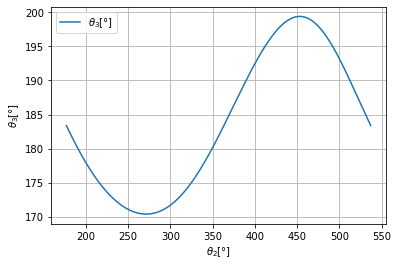

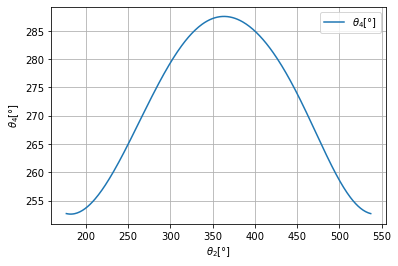

In [12]:
plt.figure()
plt.plot(np.rad2deg(th2v),np.rad2deg(th3v))
plt.legend([r"$\theta_3[°]$"])
plt.xlabel(r"$\theta_2$[°]")
plt.ylabel(r"$\theta_3$[°]")
plt.grid()
plt.figure()
plt.plot(np.rad2deg(th2v),np.rad2deg(th4v))
plt.legend([r"$\theta_4[°]$"])
plt.xlabel(r"$\theta_2$[°]")
plt.ylabel(r"$\theta_4$[°]")
plt.grid()

## Analysis

The elliptical machine's kinematics were analyzed. From the previous graphs, it is evident that the machine works as intended. Range of motion of each link is presented in the next table:

Variable|Range
:---:|:---:
$\theta_2$|0° - 360°
$\theta_3$|170.39° - 199.37°
$\theta_4$|252.6° - 287.55°

No issues were found in the analyzed range of the input variable.

# Velocity Analysis

Velocity analysis to be done with ```sympy```

In [13]:
import sympy as sym
from sympy.physics.mechanics import dynamicsymbols, init_vprinting

sym.init_printing(use_unicode=False, wrap_line=True)
init_vprinting()

Definition of variables as time-dependent

In [14]:
t = sym.Symbol('t')
# Parámetros
r2s = sym.Symbol('r_2')
r3s = sym.Symbol('r_3')
r4s = sym.Symbol('r_4')
r1xs = sym.Symbol('r_{1x}')
r1ys = sym.Symbol('r_{1y}')
# Variables definidas como funcion para luego hacerlas depender de t
th2s, th3s, th4s = sym.symbols('theta_2 theta_3 theta_4', cls=sym.Function)
# Primera derivada de las variables con respecto al tiempo
th2sp = sym.diff(th2s(t),t)
th3sp = sym.diff(th3s(t),t)
th4sp = sym.diff(th4s(t),t)
# Segunda derivada de las variables con respecto al tiempo
th2spp = sym.diff(th2s(t),t,t)
th3spp = sym.diff(th3s(t),t,t)
th4spp = sym.diff(th4s(t),t,t)

Equations to differentiate

```python
    Y[0] = r2*np.cos(th2) + r3*np.cos(th3) - r4*np.cos(th4) - r1x*np.cos(np.pi);
    Y[1] = r2*np.sin(th2) + r3*np.sin(th3) - r4*np.sin(th4) - r1y;
``` 


In [15]:
eq1 = r2s*sym.cos(th2s(t)) + r3s*sym.cos(th3s(t)) - r4s*sym.cos(th4s(t)) - r1xs*sym.cos(sym.pi);
eq2 = r2s*sym.sin(th2s(t)) + r3s*sym.sin(th3s(t)) - r4s*sym.sin(th4s(t)) - r1ys;
eq1,eq2

Now we differentiate

In [16]:
eq1p = sym.diff(eq1,t)
eq2p = sym.diff(eq2,t)
eq1p,eq2p

Now we have to take the matrix form of the equations

In [17]:
th2ssym, th3ssym, th4ssym = sym.symbols('theta_2 theta_3 theta_4')
th2spsym, th3spsym, th4spsym = sym.symbols('\dot{\\theta_2} \dot{\\theta_3} \dot{\\theta_4}')
th2sppsym, th3sppsym, th4sppsym = sym.symbols('\ddot{\\theta_2} \ddot{\\theta_3} \ddot{\\theta_4}')
th2ssym,th2spsym,th2sppsym

For sympy, the defined symbols do not relate to time, so we have to do some variable changes

In [18]:
eq1psym = eq1p.subs([
                  (th2sp,th2spsym),
                  (th3sp,th3spsym),
                  (th4sp,th4spsym)
                   ])
eq2psym = eq2p.subs([
                  (th2sp,th2spsym),
                  (th3sp,th3spsym),
                  (th4sp,th4spsym)
                    ])
eq1psym,eq2psym

After substituting, we can obtain the matrix form of the equations

In [19]:
eqns = [eq1psym,eq2psym]
As, bs = sym.linear_eq_to_matrix(eqns, [th3spsym,th4spsym])
As,bs

⎛⎡-r₃⋅sin(θ₃)  r₄⋅sin(θ₄) ⎤  ⎡\dot{\theta_2}⋅r₂⋅sin(θ₂) ⎤⎞
⎜⎢                        ⎥, ⎢                          ⎥⎟
⎝⎣r₃⋅cos(θ₃)   -r₄⋅cos(θ₄)⎦  ⎣-\dot{\theta_2}⋅r₂⋅cos(θ₂)⎦⎠

Now we try to solve the equations

In [20]:
pos = 0
th2p = 2*np.pi
As_eval = As.subs([(th3s(t),th3v[pos]),
         (th4s(t),th4v[pos]) ])
bs_eval = bs.subs([(th2s(t),th2v[pos]),
              (th2spsym,th2p) ])
As_eval,bs_eval

⎛⎡0.0588172827407371⋅r₃  -0.954720883437449⋅r₄⎤  ⎡0.332168043665734⋅r₂⎤⎞
⎜⎢                                            ⎥, ⎢                    ⎥⎟
⎝⎣-0.998268765038252⋅r₃  0.297502999528437⋅r₄ ⎦  ⎣6.27439893496777⋅r₂ ⎦⎠

In [21]:
xs = As.LUsolve(bs)
xs_eval = As_eval.LUsolve(bs_eval)
xs = sym.simplify(xs)
xs,xs_eval

⎛⎡-\dot{\theta_2}⋅r₂⋅sin(θ₂ - θ₄) ⎤  ⎡-6.50846276705919⋅r₂  ⎤⎞
⎜⎢────────────────────────────────⎥  ⎢───────────────────── ⎥⎟
⎜⎢        r₃⋅sin(θ₃ - θ₄)         ⎥  ⎢          r₃          ⎥⎟
⎜⎢                                ⎥, ⎢                      ⎥⎟
⎜⎢-\dot{\theta_2}⋅r₂⋅sin(θ₂ - θ₃) ⎥  ⎢-0.748887084012612⋅r₂ ⎥⎟
⎜⎢────────────────────────────────⎥  ⎢──────────────────────⎥⎟
⎝⎣        r₄⋅sin(θ₃ - θ₄)         ⎦  ⎣          r₄          ⎦⎠

In [23]:
pos = 0
xs.subs([(r2s,r2),
         (r3s,r3),
         (r4s,r4),
         (th2spsym,th2p),
         (th2s(t),th2v[pos])])

⎡1.5707963267949⋅sin(θ₄ - 3.08870181111509) ⎤
⎢────────────────────────────────────────── ⎥
⎢               sin(θ₃ - θ₄)                ⎥
⎢                                           ⎥
⎢1.88495559215388⋅sin(θ₃ - 3.08870181111509)⎥
⎢───────────────────────────────────────────⎥
⎣                sin(θ₃ - θ₄)               ⎦

## by linear algebra solve

In [25]:
th2 = th2v[pos]
th3 = th3v[pos]
th4 = th4v[pos]
print("theta2= ",np.rad2deg(th2),"theta3= ",np.rad2deg(th3),"theta4= ",np.rad2deg(th4))

am = [[-r3*np.sin(th3),r4*np.sin(th4)],
      [r3*np.cos(th3),-r4*np.cos(th4)]]
bv = [r2*np.sin(th2)*th2p,
      -r2*np.cos(th2)*th2p]
print(am,bv)
[th3p,th4p] = np.linalg.solve(am,bv) # el resultado de solve es el vector x
print(th3p,th4p)

theta2=  176.96957795130825 theta3=  183.3719281547847 theta4=  252.69231095262649
[[0.7058073928888455, -9.547208834374489], [-11.97922518045902, 2.97502999528437]] [0.9965041309972031, 18.823196804903315]
-1.6271156917647998 -0.22466612520378346


# Animation

## Point Definition for motion range

In [26]:
pOx = 0
pOy = 0
pAx = r2*np.cos(th2v)
pAy = r2*np.sin(th2v)
pBx = pAx + r3*np.cos(th3v)
pBy = pAy + r3*np.sin(th3v)
pCx = -r1x
pCy = r1y

## Canvas setup

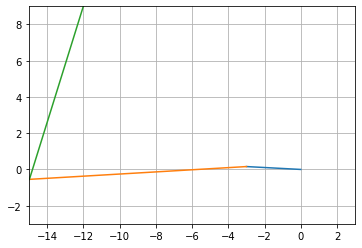

In [27]:
indice = 0
fig = plt.figure()
hr2 = plt.plot([pOx,pAx[indice]],[pOy,pAy[indice]])
hr3 = plt.plot([pBx[indice],pAx[indice]],[pBy[indice],pAy[indice]])
hr4 = plt.plot([pCx,pBx[indice]],[pCy,pBy[indice]])
plt.axis("scaled")
plt.xlim(-r2-r3,r2)
plt.ylim(-r2,r1y)
plt.grid()
plt.draw() 

## Function

In [37]:
def animar(i):
    manivelaX = np.array([pOx,pAx[i]])
    manivelaY = np.array([pOy,pAy[i]])
    acopladorX = np.array([pBx[i],pAx[i]])
    acopladorY = np.array([pBy[i],pAy[i]])
    balancinX = np.array([pCx,pBx[i]])
    balancinY = np.array([pCy,pBy[i]])
    hr2[0].set_xdata(manivelaX)
    hr2[0].set_ydata(manivelaY)
    hr3[0].set_xdata(acopladorX)
    hr3[0].set_ydata(acopladorY)
    hr4[0].set_xdata(balancinX)
    hr4[0].set_ydata(balancinY)
    
#     return hr2[0],hr3[0],hr4[0]

## Animation parameters

In [38]:
from matplotlib.animation import FuncAnimation

videoLength = 5000 # duración de la animación en milisegundos 
maxFrames = 80 # tamaño de la animación en fotogramas

increment = int(np.ceil(numpos/maxFrames))
totalFrames = range(0,numpos,increment)  #lista con posiciones a evaluar
animacion = FuncAnimation(fig, 
                          animar, 
                          frames = totalFrames,
                          interval=videoLength/len(totalFrames),
                          save_count=len(totalFrames))

## Display

In [39]:
#En Jupyter se pueden mostrar las animaciones directamente en el cuaderno
from IPython.display import HTML

# Comentar para reducir tamaño del cuaderno, generar animación en formato gif o mp4, requiere instalar ffmpeg
#animacion.save('animation.mp4', writer='ffmpeg', fps=15)
HTML(animacion.to_jshtml())

# References

autor, c., & otro, a. (2021). Libro de las elipticas. Medellín: UPB.

Norton, Robert L. 2009. Diseño de Maquinaria. 4th ed. McGraw-Hill Interamericana de España S.L.

Shyu, J. -., Chen, C. -., Yu, C. -., & Luo, Y. -. (2011). Research and development of an adjustable elliptical exerciser doi:10.4028/www.scientific.net/AMR.308-310.2078 Retrieved from www.scopus.com